바이올린차트 (Violin Plot)

바이올린 차트(Violin Plot)는 박스플롯(Box Plot)과 커널 밀도 추정(Kernel Density Estimation, KDE)을 결합한 시각화 도구

## 1. 기본 시각 예시 (Seaborn 사용)

C:\Users\JYB\AppData\Local\Temp\ipykernel_13556\4023071464.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="종목", y="수익률", data=df, palette='Set2')


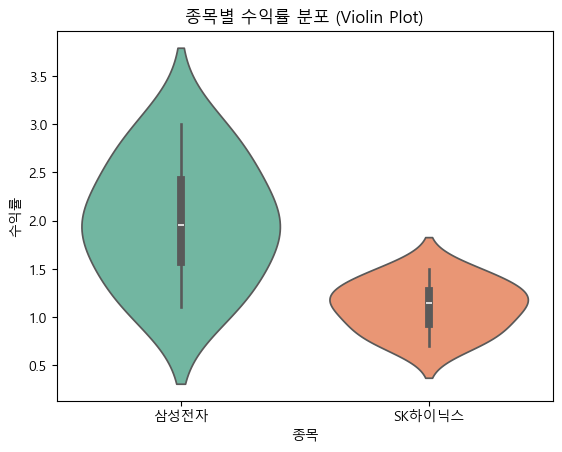

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 예시 데이터 생성
df = pd.DataFrame({
    "종목": ["삼성전자"] * 10 + ["SK하이닉스"] * 10,
    "수익률": [1.2, 1.8, 2.0, 1.5, 1.1, 1.9, 2.5, 3.0, 2.7, 2.2,
             0.8, 1.0, 1.2, 0.9, 1.4, 1.1, 1.3, 0.7, 1.5, 1.2]
})

# 바이올린차트
sns.violinplot(x="종목", y="수익률", data=df, palette='Set2')
plt.title("종목별 수익률 분포 (Violin Plot)")
plt.show()


## 2. 삼성전자(005930)의 월별 수익률(Seaborn 바이올린 차트(Violin Plot)

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
C:\Users\JYB\AppData\Local\Temp\ipykernel_13556\1640671678.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='월', y='수익률', data=df, palette='coolwarm', inner='box')


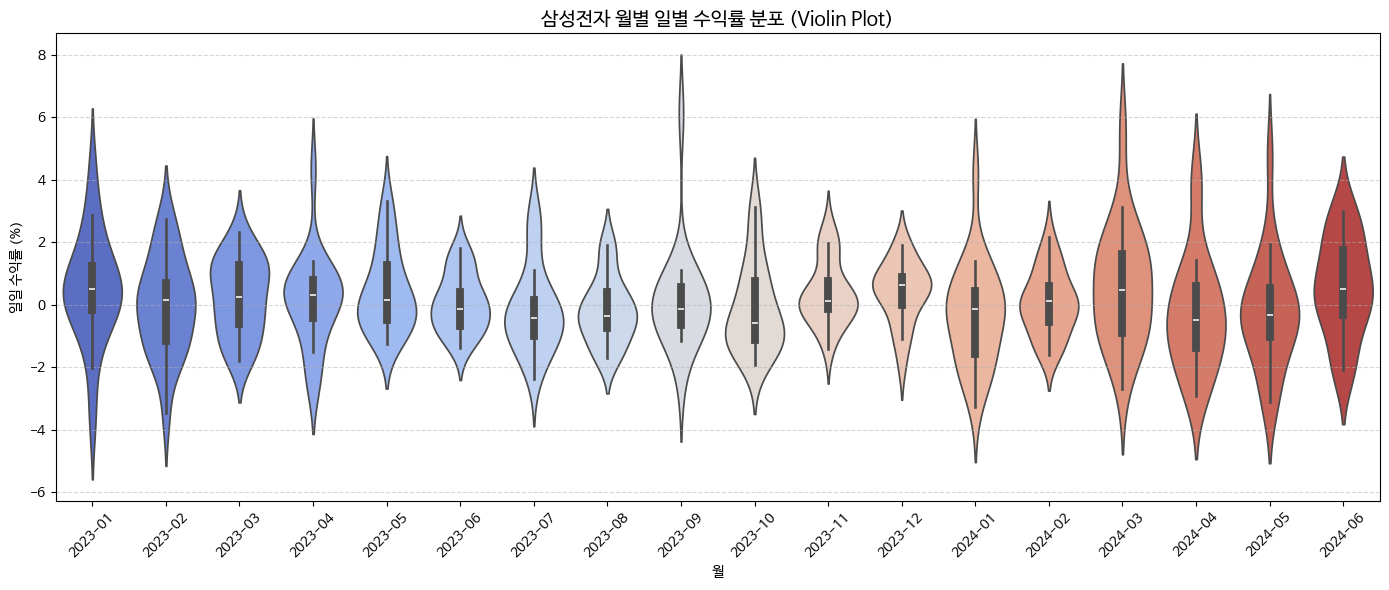

In [3]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ▶️ 1. 데이터 수집
start_date = "2023-01-01"
end_date = "2024-06-30"

df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 2. 수익률 계산 (일별)
df['수익률'] = df['종가'].pct_change() * 100  # 전일 대비 수익률 %
df = df.dropna()

# ▶️ 3. 월 정보 컬럼 추가 (예: 2023-01, 2023-02, ...)
df['월'] = df.index.to_period("M").astype(str)

# ▶️ 4. 시각화: Seaborn Violin Plot
plt.figure(figsize=(14, 6))
sns.violinplot(x='월', y='수익률', data=df, palette='coolwarm', inner='box')

plt.title("삼성전자 월별 일별 수익률 분포 (Violin Plot)", fontsize=14)
plt.xlabel("월")
plt.ylabel("일일 수익률 (%)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 넓은 부분: 해당 월에서 수익률이 자주 나타난 구간
# 중앙선: 일별 수익률의 중앙값
# 박스: 사분위수 구간
# 이상치(꼬리): 변동성이 큰 날들

## 3. 삼성전자 vs SK하이닉스 월별 수익률 Violin Plot

In [ ]:
# 기간: 2024년 1월 ~ 2025년 6월
# 📊 비교 항목:
# 일일 수익률: (당일 종가 / 전일 종가 - 1) * 100
# 📈 시각화 방식:
# X축: 월 (2024-01 등)
# Y축: 일일 수익률
# 색상(Hue): 종목(삼성전자 vs SK하이닉스)

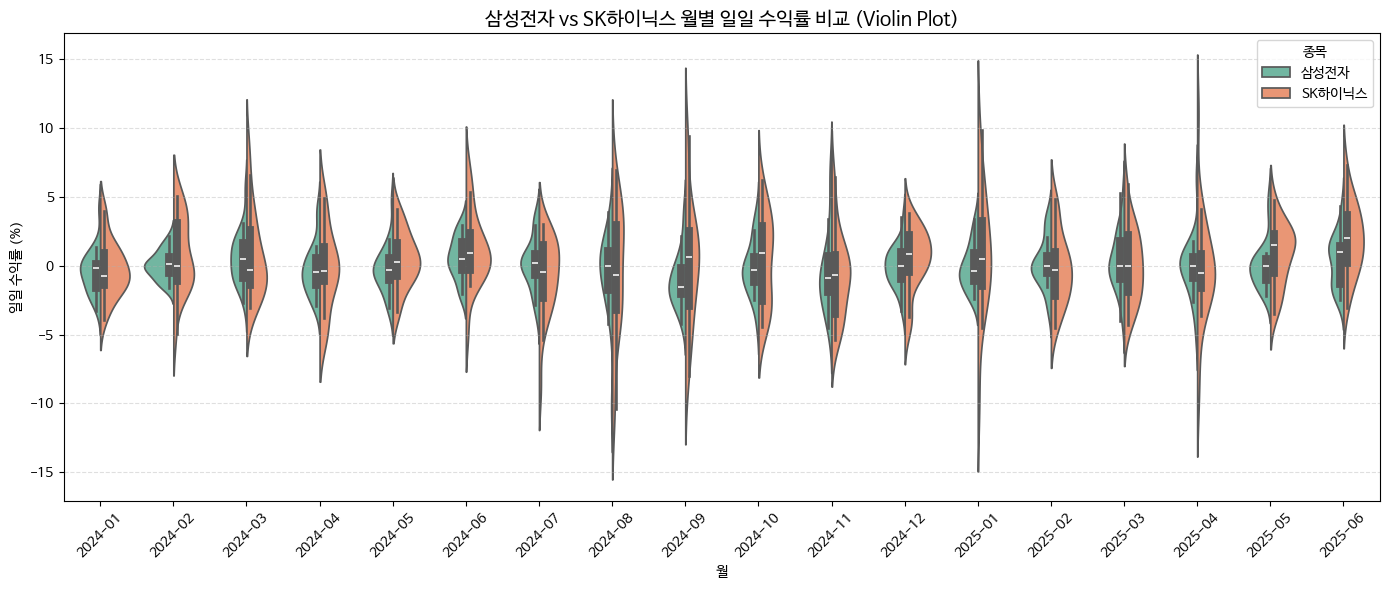

In [5]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ▶️ 1. 데이터 가져오기 함수
def get_monthly_returns(code, name):
    df = stock.get_market_ohlcv_by_date("2024-01-01", "2025-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['월'] = df.index.to_period("M").astype(str)
    df['종목'] = name
    return df[['월', '수익률', '종목']].dropna()

# ▶️ 2. 삼성전자 & SK하이닉스 수익률 데이터프레임 만들기
samsung_df = get_monthly_returns("005930", "삼성전자")
skhynix_df = get_monthly_returns("000660", "SK하이닉스")

# ▶️ 3. 데이터 병합
merged_df = pd.concat([samsung_df, skhynix_df], ignore_index=True)

# ▶️ 4. Seaborn 바이올린 플롯
plt.figure(figsize=(14, 6))
sns.violinplot(x="월", y="수익률", hue="종목", data=merged_df, split=True, inner="box", palette="Set2")

# ▶️ 5. 꾸미기
plt.title("삼성전자 vs SK하이닉스 월별 일일 수익률 비교 (Violin Plot)", fontsize=14)
plt.xlabel("월")
plt.ylabel("일일 수익률 (%)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(title="종목")
plt.show()


## 4. 분기별 일일 수익률 비교 Violin Plot (삼성전자 vs SK하이닉스)

In [ ]:
# X축: 2023Q1, 2023Q2, ..., 2024Q2
# Y축: 해당 분기 내의 일일 수익률 (%)
# split=True: 각 바이올린을 좌우로 나눠 종목별 비교 (삼성전자 vs SK하이닉스)

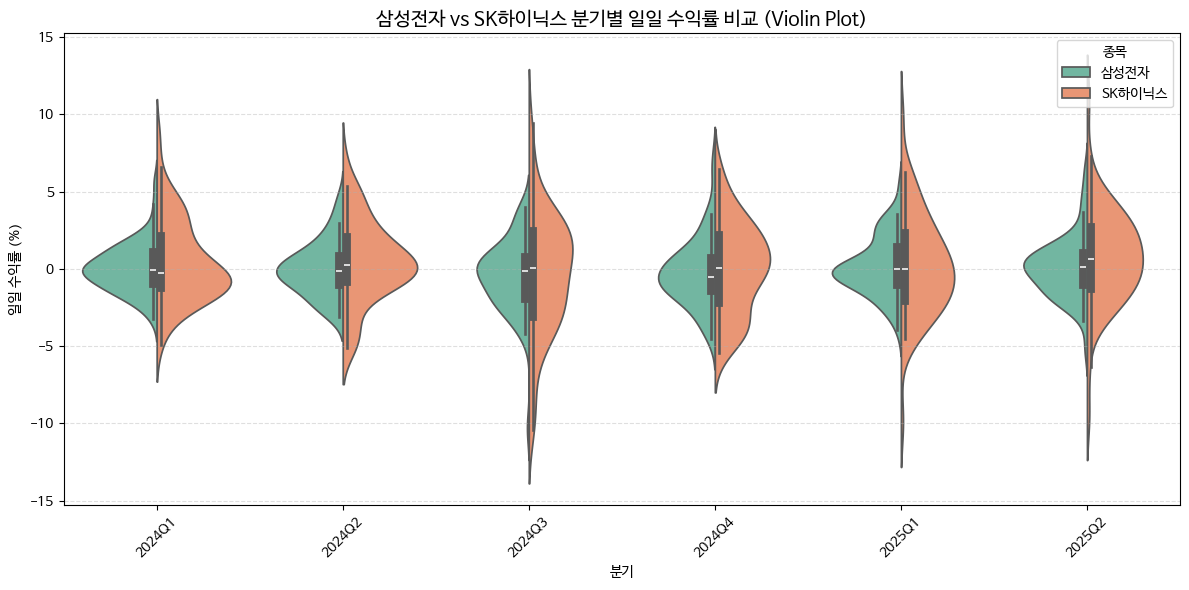

In [7]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ▶️ 1. 데이터 가져오기 함수 (분기 기준으로 변경)
def get_quarterly_returns(code, name):
    df = stock.get_market_ohlcv_by_date("2024-01-01", "2025-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['분기'] = df.index.to_period("Q").astype(str)  # '2023Q1' 형식
    df['종목'] = name
    return df[['분기', '수익률', '종목']].dropna()

# ▶️ 2. 삼성전자 & SK하이닉스 수익률 데이터프레임 만들기
samsung_df = get_quarterly_returns("005930", "삼성전자")
skhynix_df = get_quarterly_returns("000660", "SK하이닉스")

# ▶️ 3. 데이터 병합
merged_df = pd.concat([samsung_df, skhynix_df], ignore_index=True)

# ▶️ 4. Seaborn 바이올린 플롯 (분기 기준)
plt.figure(figsize=(12, 6))
sns.violinplot(x="분기", y="수익률", hue="종목", data=merged_df, split=True, inner="box", palette="Set2")

# ▶️ 5. 꾸미기
plt.title("삼성전자 vs SK하이닉스 분기별 일일 수익률 비교 (Violin Plot)", fontsize=14)
plt.xlabel("분기")
plt.ylabel("일일 수익률 (%)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(title="종목")
plt.show()


## 5. 4개 종목 분기별 수익률 비교 Violin Plot

In [ ]:
# 항목	내용
# 종목	삼성전자, SK하이닉스, 현대차, LG에너지솔루션
# X축	2024Q1 ~ 2025Q2
# Y축	일일 수익률 (%)
# hue	종목별 색상 구분
# inner='box'	바이올린 내부에 사분위 박스 포함

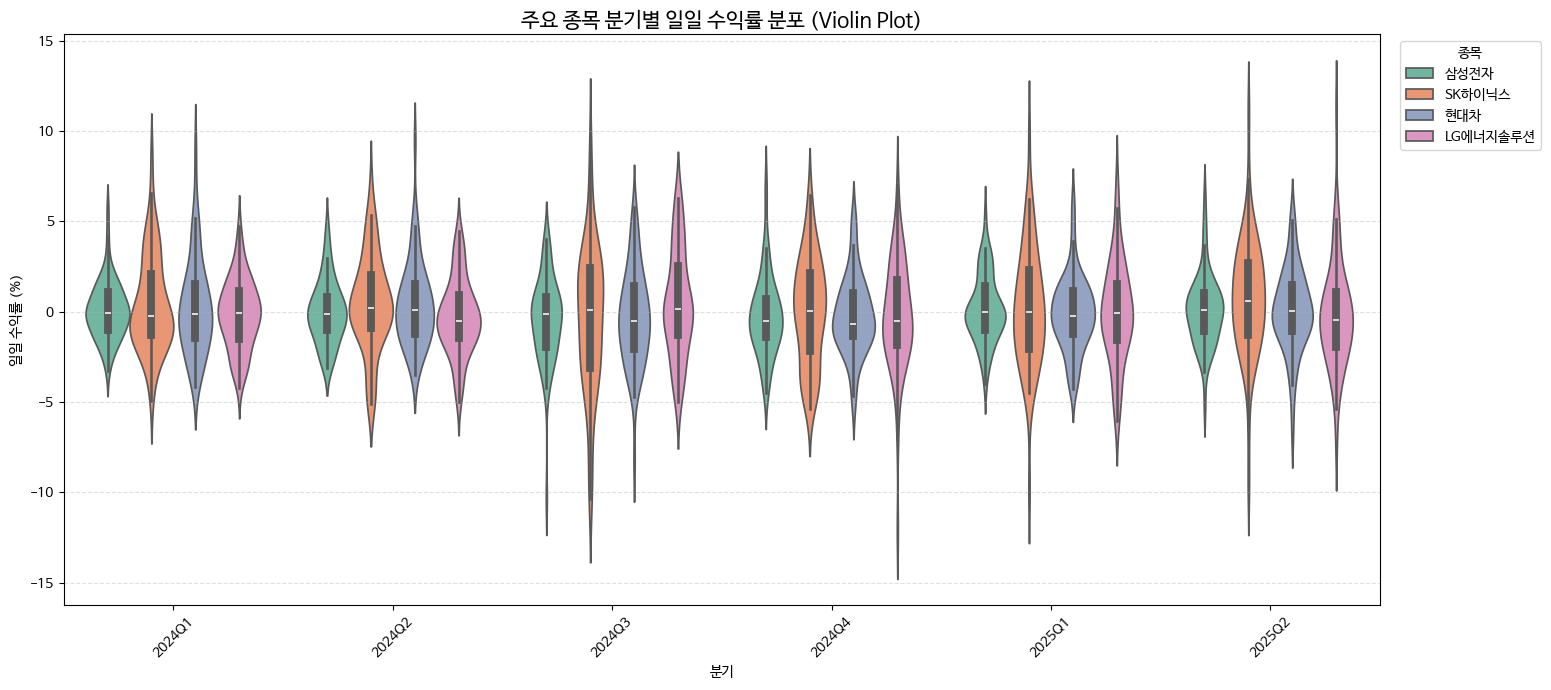

In [9]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ▶️ 1. 수익률 계산 함수 (분기별)
def get_quarterly_returns(code, name):
    df = stock.get_market_ohlcv_by_date("2024-01-01", "2025-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['분기'] = df.index.to_period("Q").astype(str)
    df['종목'] = name
    return df[['분기', '수익률', '종목']].dropna()

# ▶️ 2. 각 종목 데이터프레임 생성
samsung_df = get_quarterly_returns("005930", "삼성전자")
skhynix_df = get_quarterly_returns("000660", "SK하이닉스")
hyundai_df = get_quarterly_returns("005380", "현대차")
lgenergy_df = get_quarterly_returns("373220", "LG에너지솔루션")

# ▶️ 3. 데이터 병합
merged_df = pd.concat([samsung_df, skhynix_df, hyundai_df, lgenergy_df], ignore_index=True)

# ▶️ 4. Seaborn Violin Plot (hue → 종목별 색상 분리)
plt.figure(figsize=(14, 7))
sns.violinplot(
    x="분기",
    y="수익률",
    hue="종목",
    data=merged_df,
    inner="box",
    palette="Set2"
)

# ▶️ 5. 그래프 꾸미기
plt.title("주요 종목 분기별 일일 수익률 분포 (Violin Plot)", fontsize=15)
plt.xlabel("분기")
plt.ylabel("일일 수익률 (%)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(title="종목", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()
